*Alexis Adrian Carrillo Medina (316733780)*

---
<center> <h1>  <b> Simulacion Estocastica </b> <br>
<b> Proyecto 2 </b>
<hr>

### **Bibliotecas**

In [49]:
using Random, Distributions, StatsPlots, Plots

### **Programe el algoritmo de Monte Carlo Hamiltoniano y uselo para simular de la mixtura de Gaussianas del proyecto 3**

#### ***Solucion***

Antes de empezar, programaremos un Monte Carlo Hamiltoniano General<br> 
En este caso simularemos una mixtura de Gaussianas, de una dimension, tal que $P \sim Normal(0,1)$, es decir $K(p)=\frac{p^2}{2}$

In [50]:

# ------ Funciones Auxiliares -------
function nDerivativeK(K, x, δ)
    
    """ 
    Algoritmo para derivada numerica de K en x
    
    K := Energia cinetica
    x := Punto a evaluar
    δ := Longitud de paso
    
    """
    # Definicion de derivada
    return (K(x+δ)-K(x))/δ
    
end

function nDerivativeU(U, f, params, x, δ)
        
    """ 
    Algoritmo para derivada numerica de U en x
    
    U := Energia potencial
    f := Distribucion a simular
    x := Punto a evaluar
    δ := Longitud de paso
    
    """
    # Definicion de derivada
    return (U(x+δ,f,params)-U(x,f,params))/δ
    
end

function U(x,f,params)
    
    """
    Energia potencial
    
    """
    
    # Definicion de U
    return -log(f(x,params))
end

function K(p)
    
    """
    Energia Cinetica
    
    """
    
    # Definicion de K
    return p^2/2
    
end

function leapFrog(Pₙ, Xₙ, U, f, params, K, ϵ, m)
    
    """ 
    Algoritmo leapFrog
    
    Pₙ := Momento n
    Xₙ := Posicion n
    U := Funcion de energia potencial 
    K := Funcion de energia cinetica
    f := Distribucion a simular
    ϵ := Longitud de paso
    m := Numero de pasos
    
    """
    
    # Variables auxiliares
    p = Pₙ - ϵ/2*nDerivativeU(U,f,params,Xₙ,0.0001)
    x = Xₙ + ϵ/2*nDerivativeK(K,p,0.0001)
    p = p - ϵ/2*nDerivativeU(U,f,params,x,0.0001)
    
    # Leapfrog para m pasos
    for i in 1:m

        p = p - ϵ/2*nDerivativeU(U,f,params,x,0.0001)
        x = x + ϵ/2*nDerivativeK(K,p,0.0001)
        p = p - ϵ/2*nDerivativeU(U,f,params,x,0.0001)
        
    end
    
    return x,p
    
end

# ------- Monte Carlo Hamiltoniano ---------
function HMC(f, params, X₀, ϵ, N, n)
        
    """ 
    Algoritmo de Monte Carlo Hamiltoniano para f general
    
    f := Distribucion a simular
    params := Parametros de f
    X₀ := Posicion inicial
    ϵ := Longitud de paso del leapfrog
    N := Numero de pasos del leapfrog
    n := Numero de movimientos en la cadena
    
    """
    
    # Vector de estados de X
    statesX=[]
    
    # Distribucion Inicial de X
    Xₙ=X₀
    
    # Monte Carlo Hamiltoniano
    for i in 1:n
        
        # P̂ₙ ∼ Normal(0,1)
        P̂ₙ=rand(Normal(0,1))
        
        # Guardamos los estados
        append!(statesX,Xₙ)
        
        # Aproximacion numerica de Yₙ y Gₙ 
        Yₙ, Gₙ = leapFrog(P̂ₙ,Xₙ,U,f,params,K,ϵ,N)
        
        # V ~ V(0,1)
        V=rand(Uniform(0,1))
        
        # Aceptacion
        if V < min(1,ℯ^(((-U(Yₙ,f,params)-K(Gₙ)))+(U(Xₙ,f,params)+K(P̂ₙ))))
            Xₙ=Yₙ
        end
    end
    
    # Regresamos la cadena despues del quemado
    return statesX
end

HMC (generic function with 1 method)

**Pruebas**

Probemos que funciona con una distribucion conocida <br>
Sea $X \sim Gamma(2,3)$ <br>
Veamos una simulacion dada por el Monte Carlo Hamiltoniano

In [52]:
function f(x,params)
    return pdf(Gamma(params[1],params[2]),x)
end

X=HMC(f,[2,3],2,0.1,50,10000)
println("Simulacion por HMC")

Simulacion por HMC


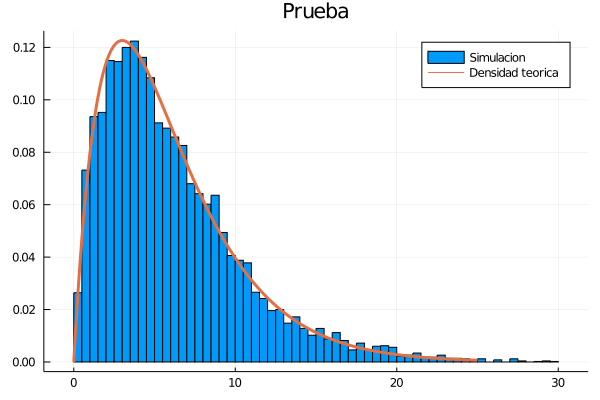

In [53]:
histogram(X,normed=true,label="Simulacion",title="Prueba")
plot!(range(0,stop=25,step=.1),pdf(Gamma(2,3),range(0,stop=25,step=.1)),lw=3,label="Densidad teorica")

Parece coincidir de manera correcta.<br> Entonces nuestro algoritmo funciona de manera correcta

**Mixtura de Gaussianas**

Queremos simular una mixtura de Gaussianas independientes tales que
$$\mu_1=-3.0,\; \sigma_1=1.5 \quad \mu_2=3.0,\; \sigma_2=2.5 $$
Con probabilidades de pertecener a cada componente de la mezcla $\frac{3}{5}, \frac{2}{5}$ respectivamente <br>
Es decir, su funcion de distribucion esta dada por

$$f(x)=\frac{3}{5} \cdot f_{\mu_1, \sigma_1}(x) + \frac{2}{5} \cdot f_{\mu_2, \sigma_2}(x)$$

Simulemos de dicho modelo de mixtura

In [39]:
# Numero de simulaciones
n=10000

# Parametros originales
μ₁=-3.0
σ₁=1.5

μ₂=3.0
σ₂=2.5

# Parametros de la mixtura
parametros=Matrix{Float64}(undef, 3, 2)
parametros[1,1]=3/5
parametros[1,2]=2/5
parametros[2,1]=μ₁
parametros[2,2]=μ₂
parametros[3,1]=σ₁
parametros[3,2]=σ₂
parametros

3×2 Array{Float64,2}:
  0.6  0.4
 -3.0  3.0
  1.5  2.5

In [40]:
# Funcion auxiliar para la mixtura
function g(x,params)
    return params[1]*pdf(Normal(params[2],params[3]),x)
end

# Distribucion de la mixtura de gaussianas
function f(x,params)
    aux=0
    for i in 1:2
        aux+=g(x,params[:,i])
    end
    return aux
end

f (generic function with 1 method)

In [48]:
# Simulacion apartir de Monte Carlo Hamiltoniano
X=HMC(f,parametros,0,0.1,50,n)
println("Simulacion por HMC")

Simulacion por HMC


Veamos como funciona el Monte Carlo Hamiltoniano con la mixtura propuesta

In [34]:
x=range(-5,stop=5,step=0.1)
y=range(-5,stop=5,step=0.1)

function S(x,p)
    
    """
    Hamiltoniano
    
    """
    
    return U(x,f,parametrosAprior)+K(p)
end

surface(y,x,S,camera=(50,40),legend=false)
anim=Animation()


for j in 1:10
    
    statesX=[]
    statesP=[]
    statesAUX=[]
    
    Pₙ=rand(Normal(0,1),1)[1]
    append!(statesP,Pₙ)
    
    Xₙ=rand(Uniform(-5,5))[1]
    append!(statesX,Xₙ)
    
    append!(statesAUX,0)
    
    ϵ=1
    
    p = Pₙ - ϵ/2*nDerivativeU(U,f,parametrosAprior,Xₙ,0.0001)
    x = Xₙ + ϵ/2*nDerivativeK(K,p,0.0001)
    p = p - ϵ/2*nDerivativeU(U,f,parametrosAprior,x,0.0001)
    
    scatter!([Xₙ],[Pₙ],[0],color=:green)
    frame(anim)
    
    # Leapfrog para 10 pasos
    for i in 1:10

        p = p - ϵ/2*nDerivativeU(U,f,parametrosAprior,x,0.0001)
        x = x + ϵ/2*nDerivativeK(K,p,0.0001)
        p = p - ϵ/2*nDerivativeU(U,f,parametrosAprior,x,0.0001)
        
        append!(statesP,p)
        append!(statesX,x)
        append!(statesAUX,0)
        
        plot!(statesX,statesP,statesAUX,line=:dash,color=:green,alpha=i/10)
        frame(anim)
        
        
    end
    
    scatter!([x],[p],[0],color=:blue)
    frame(anim)
    
end

┌ Info: Saved animation to 
│   fn = /home/a-carrillo/Documents/Escuela/Tareas/Simulacion Estocastica/Proyecto 2/anim.gif
└ @ Plots /home/a-carrillo/.julia/packages/Plots/lmp2A/src/animation.jl:104


Plots.AnimatedGif("/home/a-carrillo/Documents/Escuela/Tareas/Simulacion Estocastica/Proyecto 2/anim.gif")
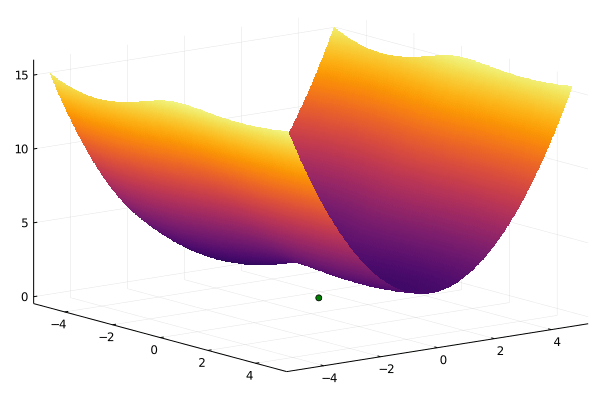

In [35]:
gif(anim,"anim.gif",fps=8)

Se comporta como se espera. <br>
Por ultimo, veamos la grafica de la distribucion teorica contra la simulacion

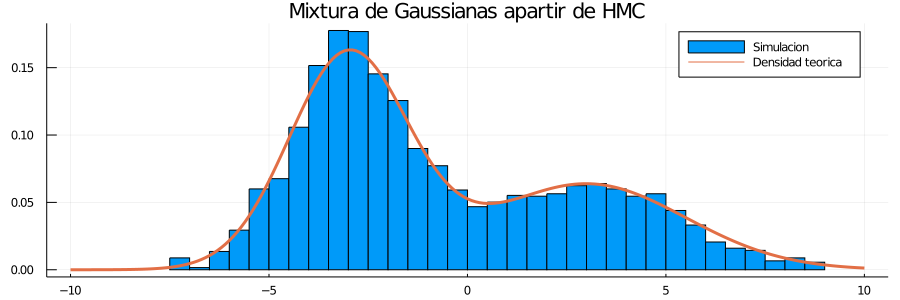

In [47]:
function h(x)
    aux=0
    for i in 1:2
        aux+=g(x,parametrosAprior[:,i])
    end
    return aux
end

histogram(X,normed=true,label="Simulacion",title="Mixtura de Gaussianas apartir de HMC")
plot!(range(-10,stop=10,step=.1),h,lw=3,label="Densidad teorica",size=(900,300))

Por lo que, en efecto, el Monte Carlo Hamiltoniano simula de la mixtura de Gaussianas propuesta